In [1]:
import pandas as pd
import os
from statistics import mean
import matplotlib.pyplot as plot
import seaborn as sbrn

## Cilj:
Analizirati naslednje:
    -pri kateri starosti šahisti dosežejo svoj največji ELO
    -vpliv nacionalnosti na uspeh
    -ali lahko glede na performance nižjih 100 določimo kdo bo prišel v višjih 100

Zanima nas pri kateri starosti šahisti dosežejo svoj vrhunec. Postopek, da pridobimo to informacijo bo naslednji:
    1)Ustvarili bomo kopijo seznama sahisti ter v to kopijo shranili podatke o tem pri kateri starosti šahist doseže svoj največji ELO rating; podobno bomo naredili tudi z podatkom pri kateri starosti šahist doseže svoj največji indeks na lestvici najboljših 100 šahistov. Ta podatka nista nujno enakovredna, zaradi rating inflationa (https://en.wikipedia.org/wiki/Elo_rating_system#Mathematical_details)
    2)Statistično analizirali to - verjetno z preprosto aritmetično sredino.
    3) Kreacija grafikonov

In [2]:
pot = r'C:\Users\hugot\Documents\FMF\1_letnik\UVP-projektna-naloga\podatkovna_baza'
pot_shallow = r'C:\Users\hugot\Documents\FMF\1_letnik\UVP-projektna-naloga'
sahisti_elo = []

for filename in os.listdir(pot):
    ime_sahista = filename.replace('_', ' ')
    trenutni_maksimum = [(1-2000, 0)]
    datotecna_pot = os.path.join(pot, filename)
    podatki = pd.read_csv(datotecna_pot, index_col = 'datum', sep = ',')
    for datum, vrstica in podatki.iterrows():
        rating = int(vrstica['rating'])
        if rating > trenutni_maksimum[0][1]:
            trenutni_maksimum = [(datum, rating)]
        #naslednja vrstica poskrbi, da ne zgrešimo, če šahist doseže svoj najvišji 
        #rating več kot enkrat.
        elif rating == trenutni_maksimum[0][1]: 
            trenutni_maksimum.append((datum, rating))
    sahisti_elo.append({'Ime': ime_sahista, 'Maksimumi' : trenutni_maksimum})
#sahisti_elo je seznam slovarjev, vsebujoc informacje o imenu ter
#maksimalnih ratingih (datum, rating) kjer je rating sahistov najvisji rating, 
#datum pa eden izmed datumov, na katerega je slednjega dosegel

#Sedaj bomo v seznam slovarjev sahisti_elo za vsakega šahista dodali še starost, pri kateri je dosegel maksimalni rating, če je teh več pa več starosti.
general_info = pd.read_csv(os.path.join(pot_shallow, 'sahisti'), sep=',')

print(type(general_info))

for sahist in sahisti_elo:
    ime_sahista = sahist['Ime']
    maksimumi = sahist['Maksimumi']
    sahist['Najvišji rating'] = maksimumi[0][1]
    sahist['Starosti ob najvišjih ratingih'] = []
    #Opomnik: maksimum je seznam nizov dveh podatkov, prvi je datum, drugi pa maksimalni elo šahista
    for indeks, vrstica in general_info.iterrows():
        if vrstica['Ime'] == ime_sahista:
            sahist['Leto rojstva'] = vrstica['Leto rojstva']
    for maksimum in maksimumi:
        sahist['Starosti ob najvišjih ratingih'].append(int(maksimum[0][3:]) - sahist['Leto rojstva'])
    sahist['Povprecna starost pri najvišjem ratingu'] = round(mean(sahist['Starosti ob najvišjih ratingih']), 1)
    sahist['Najmlajsa starost pri najvišjem ratingu'] = min(sahist['Starosti ob najvišjih ratingih'])
    sahist['Največja starost pri najvišjem ratingu'] = max(sahist['Starosti ob najvišjih ratingih'])
sahisti_elo_pandas = pd.DataFrame(sahisti_elo, columns=['Ime', 'Leto rojstva', 'Najvišji rating', 'Povprecna starost pri najvišjem ratingu', 'Najmlajsa starost pri najvišjem ratingu', 'Največja starost pri najvišjem ratingu'])

sahisti_elo_pandas.head(10)

<class 'pandas.core.frame.DataFrame'>


,Ime,Leto rojstva,Najvišji rating,Povprecna starost pri najvišjem ratingu
0,"Abasov, Nijat",1995,2679,28.0
1,"Abdusattorov, Nodirbek",2004,2769,20.0
2,"Acs, Peter",1981,2623,22.0
3,"Adams, Michael",1971,2761,44.7
4,"Adhiban, B",1992,2701,27.0
5,"Adianto, Utut",1965,2598,36.0
6,"Afromeev, Vladimir",1954,2646,53.8
7,"Agrest, Evgenij",1966,2616,38.0
8,"Akobian, Varuzhan",1983,2673,34.0
9,"Akopian, Vladimir",1971,2713,35.3


Uspešno smo sestavili razpredelnico, ki vsebuje imena vseh šahistov, leta rojstva, njihove najvišje ratinge ter povprečno starost pri najvišjem ratingu.
Zanima nas, pri kateri starosti šahisti v splošnem dosežejo svojo najvišji rating.

Da bi to analizirali uspešno moramo upoštevati še dejstvo, da nekateri igralci še niso dosegli svojega najvišjega ratinga; oz. ga trenutno dosegajo. Prvega faktorja žal ne moramo odpraviti, saj ne znamo predvideti, ali bo posameznik v prihodnosti postal boljši, slabši ali pa če bo celo nehal igrati šah na profesionalnem nivoju. Drugi faktor pa bomo nagovorili tako, da iz statistične analize eliminiramo vse igralce, ki so svoj najvišji rating dosegli v zadnjih 6 mesecih.

Korchnoi, Viktor


Text(0, 0.5, 'Najvišji rating')

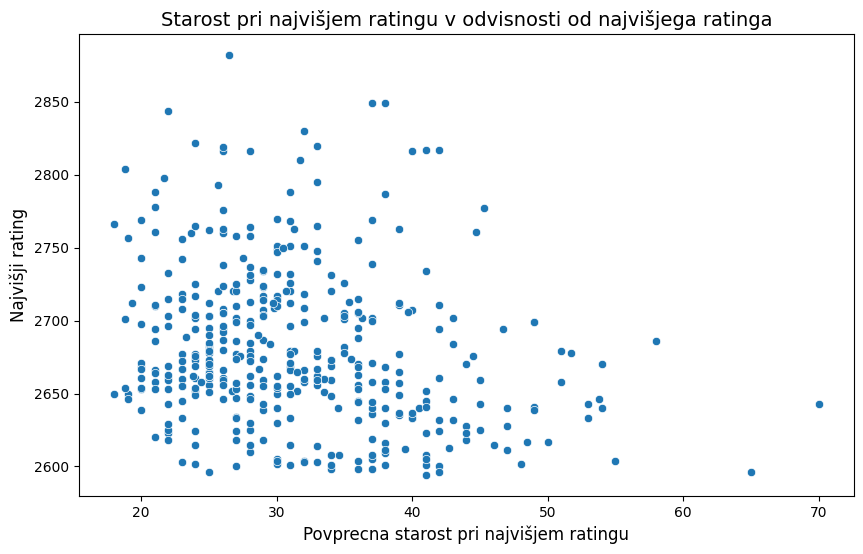

In [5]:
shp = sahisti_elo_pandas
shp = shp[shp['Povprecna starost pri najvišjem ratingu'] - (2024 - shp['Leto rojstva']) <= 0.5]

shp.head(10)

for entry in sahisti_elo:
    if entry['Povprecna starost pri najvišjem ratingu'] == 70:
        print(entry['Ime'])
        
plot.figure(figsize=(10,6))
sbrn.scatterplot(data = shp, x='Povprecna starost pri najvišjem ratingu', y= 'Najvišji rating')

plot.title('Starost pri najvišjem ratingu v odvisnosti od najvišjega ratinga', fontsize = 14)
plot.xlabel('Povprecna starost pri najvišjem ratingu', fontsize=12)
plot.ylabel('Najvišji rating', fontsize=12)